In [22]:
import cv2
import h5py
import numpy as np
import matplotlib.pyplot as plt
import time

import sklearn.feature_extraction
from skimage import feature
from skimage.filters import roberts, sobel, scharr, prewitt
import networkx as nx
%matplotlib inline

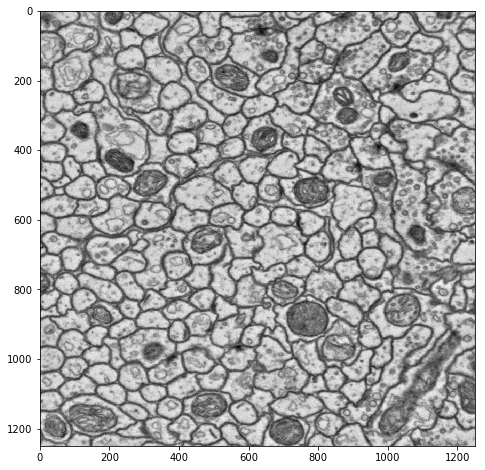

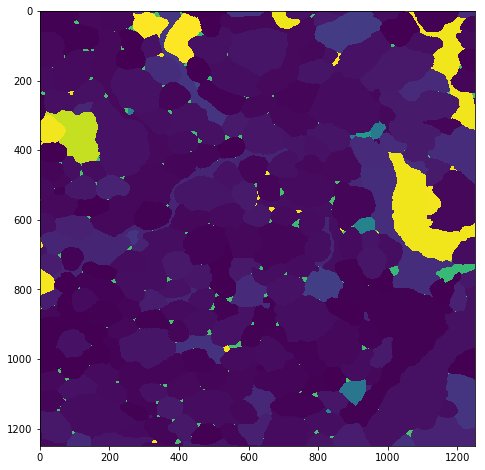

In [2]:
import h5py
import numpy as np

with h5py.File("Data/sample_A.hdf", "r") as hdf:
    raw_data = hdf['volumes']['raw'][:]
    labels = hdf['volumes']['labels']['neuron_ids'][:]
    
plt.figure(figsize=(12,8))
plt.imshow(raw_data[1,:,:], cmap="gray")

plt.figure(figsize=(12,8))
plt.imshow(labels[1,:,:])

In [52]:
labels[0,:,:]

array([[  885,  2064,  2064, ..., 24500, 24500, 24500],
       [ 2064,  2064,  2064, ..., 24500, 24500, 24500],
       [ 2064,  2064,  2064, ..., 24500, 24500, 24500],
       ..., 
       [ 6036,  6036,  6036, ..., 19935, 19935, 19935],
       [ 6036,  6036,  6036, ..., 19935, 19935, 19935],
       [ 6036,  6036,  6036, ..., 19935, 19935, 19935]], dtype=uint64)

In [15]:
matrix = sklearn.feature_extraction.img_to_graph(labels[0,:,:])
graph = nx.from_scipy_sparse_matrix(matrix)
graph.remove_edges_from(graph.selfloop_edges())

In [16]:
graph.number_of_edges()

3122500

In [21]:
start = time.time()

for i, edge in enumerate(graph.edges_iter()):
    if i == 10:
        break
    print edge
    

end = time.time()

print end - start

(0, 1)
(0, 1250)
(1, 2)
(1, 1251)
(2, 3)
(2, 1252)
(3, 4)
(3, 1253)
(4, 5)
(4, 1254)
2.56719899178


In [54]:
img = labels[0,:,:]

In [55]:
img

array([[  885,  2064,  2064, ..., 24500, 24500, 24500],
       [ 2064,  2064,  2064, ..., 24500, 24500, 24500],
       [ 2064,  2064,  2064, ..., 24500, 24500, 24500],
       ..., 
       [ 6036,  6036,  6036, ..., 19935, 19935, 19935],
       [ 6036,  6036,  6036, ..., 19935, 19935, 19935],
       [ 6036,  6036,  6036, ..., 19935, 19935, 19935]], dtype=uint64)

In [33]:
img = img.astype(np.uint8)

In [34]:
img

array([[117,  16,  16, ..., 180, 180, 180],
       [ 16,  16,  16, ..., 180, 180, 180],
       [ 16,  16,  16, ..., 180, 180, 180],
       ..., 
       [148, 148, 148, ..., 223, 223, 223],
       [148, 148, 148, ..., 223, 223, 223],
       [148, 148, 148, ..., 223, 223, 223]], dtype=uint8)

In [42]:
edge_sobel = sobel(img)
edge_scharr = scharr(img)
edge_prewitt = prewitt(img)

In [50]:
edges1 = feature.canny(img, sigma=0)

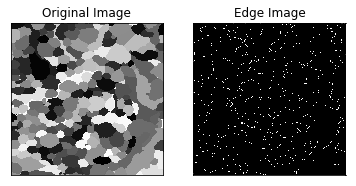

In [16]:


edges = cv2.Canny(img,100, 200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

In [40]:
edge_prewitt[np.where(edge_prewitt > 0)] = 255

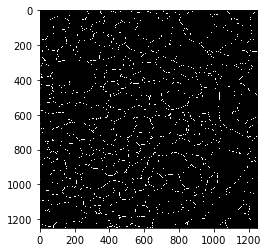

In [51]:
plt.imshow(edges1,cmap = 'gray')

In [174]:
img[0,1] = 15
img[5,1] = 15
img[0,5] = 15
img[7,3] = 15

In [175]:
img = np.expand_dims(img, axis=2)

In [176]:
n_x = img.shape[0]
n_y = img.shape[1]
n_z = 1

vertices = np.arange(n_x * n_y * n_z).reshape((n_x, n_y, n_z))
edges_deep = np.vstack((vertices[:, :, :-1].ravel(),
                            vertices[:, :, 1:].ravel()))
edges_right = np.vstack((vertices[:, :-1].ravel(),
                         vertices[:, 1:].ravel()))
edges_down = np.vstack((vertices[:-1].ravel(), vertices[1:].ravel()))
edges = np.hstack((edges_deep, edges_right, edges_down))

In [177]:
n_x, n_y, n_z = img.shape
gradient = np.abs(img[edges[0] // (n_y * n_z),
                      (edges[0] % (n_y * n_z)) // n_z,
                      (edges[0] % (n_y * n_z)) % n_z] -
                      img[edges[1] // (n_y * n_z),
                      (edges[1] % (n_y * n_z)) // n_z,
                      (edges[1] % (n_y * n_z)) % n_z])

In [162]:
img.shape

(10, 10, 1)

In [163]:
gradient.shape

(180,)

In [167]:
gradient[np.where(gradient > 0)]

array([ 870, 2049, 1179, 2049], dtype=int16)

In [168]:
(gradient > 0).shape

(180,)

In [166]:
img.flatten().shape

(100,)

In [183]:
gradient

array([ 870, 2049,    0,    0, 2049, 2049,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0, 2049, 2049,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 2049,
       2049,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0, 1179, 2049,    0,    0,    0, 2049,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 2049,
          0,    0,    0,    0,    0,    0,    0,    0,    0, 2049,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [179]:
img[:,:,0]

array([[ 885,   15, 2064, 2064, 2064,   15, 2064, 2064, 2064, 2064],
       [2064, 2064, 2064, 2064, 2064, 2064, 2064, 2064, 2064, 2064],
       [2064, 2064, 2064, 2064, 2064, 2064, 2064, 2064, 2064, 2064],
       [2064, 2064, 2064, 2064, 2064, 2064, 2064, 2064, 2064, 2064],
       [2064, 2064, 2064, 2064, 2064, 2064, 2064, 2064, 2064, 2064],
       [2064,   15, 2064, 2064, 2064, 2064, 2064, 2064, 2064, 2064],
       [2064, 2064, 2064, 2064, 2064, 2064, 2064, 2064, 2064, 2064],
       [2064, 2064, 2064,   15, 2064, 2064, 2064, 2064, 2064, 2064],
       [2064, 2064, 2064, 2064, 2064, 2064, 2064, 2064, 2064, 2064],
       [2064, 2064, 2064, 2064, 2064, 2064, 2064, 2064, 2064, 2064]], dtype=int16)

In [180]:
np.argwhere(gradient > 0)

array([[  0],
       [  1],
       [  4],
       [  5],
       [ 45],
       [ 46],
       [ 65],
       [ 66],
       [ 90],
       [ 91],
       [ 95],
       [131],
       [141],
       [153],
       [163]])

In [182]:
163 % 100

63